In [ ]:
import joblib
from google.colab import drive

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from joblib import load

from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# svc_pipe = load('/content/drive/MyDrive/Milestone_II/svc-model_final.joblib')
# svc = svc_pipe.named_steps['svc']

nvb_pipe = load('/content/drive/MyDrive/Milestone_II/multinomialnaivebayes-clf.joblib')
# svc = nvb_pipe.named_steps['svc']

In [ ]:
# Sample size
n = -1

# Which numeric features to include
features = {
    'd_chall_score': True, 
    'aoa_mean': True, 
    'aoa_min': True, 
    'aoa_max': True,
    'conc_rating_mean': True, 
    'conc_rating_min': True, 
    'conc_rating_max': True, 
    'num_lemmas': True
}

In [ ]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/Milestone_II/Training_set.csv', delimiter='\t', index_col='ix')
train['lemmatized_text'] = train['lemmatized_text'].fillna('')

test = pd.read_csv('/content/drive/MyDrive/Milestone_II/Testing_set.csv', delimiter='\t', index_col='ix')
test['lemmatized_text'] = test['lemmatized_text'].fillna('')

merged = pd.concat([train, test])

# collect feature list for df slicing
num_features = [k for k,v in features.items() if v]
txt_features = 'lemmatized_text'

In [ ]:
# split with balanced classes
if n==-1:
  sample = merged
else:
  sample = merged.groupby('label').apply(lambda grp: grp.sample(int(n/2)))

X = sample[num_features + [txt_features]]
y = sample['label']

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(nvb_pipe, X, y, cv=40, return_times=True)

# plt.plot(train_sizes,np.mean(train_scores,axis=1))
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

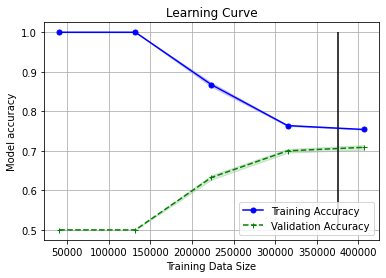

In [ ]:
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.vlines(len(train), 0.5, 1.0)
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()